In [2]:
### Logistic regression ###

# read data
import pandas as pd
titanic = pd.read_csv("titanic.csv", sep = ",", encoding = "ISO-8859-1")

# convert string values to numeric
import numpy as np
titanic['Survived'] = np.where(titanic['Survived'] == 'Survived', 1, 0)
titanic['Sex'] = np.where(titanic['Sex'] == 'female', 1, 0)

# logistic regression
import statsmodels
import statsmodels.api as sm

# fit the logistic regression
logistic_model = sm.Logit.from_formula('Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked', 
                                       data = titanic).fit()

# print the model summary
print(logistic_model.summary())

# print the model paramters
np.exp(logistic_model.params)

Optimization terminated successfully.
         Current function value: 0.458150
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                 1311
Model:                          Logit   Df Residuals:                     1301
Method:                           MLE   Df Model:                            9
Date:                Wed, 11 Dec 2019   Pseudo R-squ.:                  0.3112
Time:                        14:06:43   Log-Likelihood:                -600.64
converged:                       True   LL-Null:                       -871.96
Covariance Type:            nonrobust   LLR p-value:                4.209e-111
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.6162      0.254     -2.429      0.015      -1.114      -0.119
Pc

Intercept               0.539971
Pclass[T.Middle]        2.619341
Pclass[T.Upper]         6.963506
Embarked[T.EmbarkQ]     0.596653
Embarked[T.EmbarkS]     0.551430
Sex                    13.543629
Age                     0.964824
SibSp                   0.734246
Parch                   0.975864
Fare                    1.001366
dtype: float64

In [4]:
### Predictions using the model ###

# Predict the data and create a probability column
titanic['predProb'] = logistic_model.predict()

# Create a prediction based on probability
titanic['pred'] = np.where(titanic['predProb'] > 0.5, "Survived", 
                           "Perished")

# Print the first five rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,predProb,pred
0,1,0,Lower,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,EmbarkS,0.091263,Perished
1,2,1,Upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,EmbarkC,0.913568,Survived
2,3,1,Lower,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,EmbarkS,0.616377,Survived
3,4,1,Upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,EmbarkS,0.863582,Survived
4,5,0,Lower,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,EmbarkS,0.079159,Perished


In [5]:
### Confusion matrix ###

pd.crosstab(titanic['Survived'], titanic['pred'], rownames=['Actual'], colnames=['Predicted'])

Predicted,Perished,Survived
Actual,,
0,686,124
1,153,348


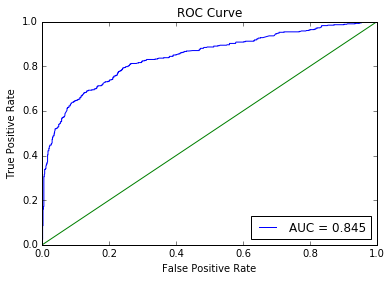

In [6]:
### ROC curve ###

# you may need to install sklearn by using the command
# !pip install -–user scikit-learn

from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, threshold = metrics.roc_curve(titanic['Survived'],
titanic['predProb'])
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = ' + str(round(roc_auc,3)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()